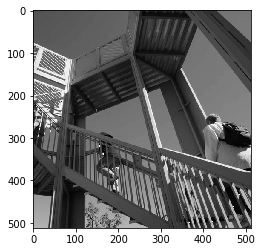

In [2]:
from scipy import misc
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


img = misc.ascent()
plt.gray()
plt.imshow(img)

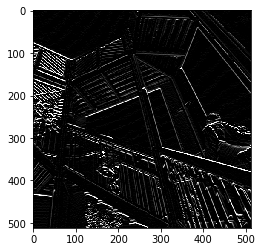

In [10]:
filter = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
# filter = filter.T


features = img.copy()
for i in range(1, img.shape[0] - 1):
    for j in range(1, img.shape[1] - 1):
        conv = img[i - 1, j - 1] * filter[0][0]
        conv += img[i - 1, j] * filter[0][1]
        conv += img[i - 1, j + 1] * filter[0][2]
        conv += img[i, j - 1] * filter[1][0]
        conv += img[i, j] * filter[1][1]
        conv += img[i, j + 1] * filter[1][2]
        conv += img[i + 1, j - 1] * filter[2][0]
        conv += img[i + 1, j] * filter[2][1]
        conv += img[i + 1, j + 1] * filter[2][2]
        
        conv = 0. if min(conv, 255.) < 0 else min(conv, 255.) 
        
        features[i, j] = conv
        
plt.imshow(features)        

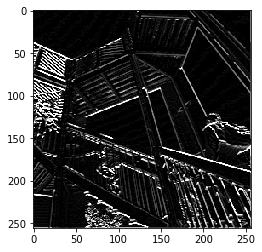

In [25]:
pool_img = np.zeros((img.shape[0] // 2, img.shape[1] // 2))

for i in range(0, features.shape[0], 2):
    for j in range(0, features.shape[1], 2):
        pool_img[i // 2, j // 2] = np.max(features[i:i+2, j:j+2])
        
plt.imshow(pool_img)        

In [13]:
import tensorflow as tf


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train / 255.
x_test = x_test / 255.

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
60000/60000 [==============================] - 7s 114us/sample - loss: 0.7427 - acc: 0.7618
Epoch 2/5
60000/60000 [==============================] - 6s 92us/sample - loss: 0.5129 - acc: 0.8251
Epoch 3/5
60000/60000 [==============================] - 6s 93us/sample - loss: 0.4671 - acc: 0.8403
Epoch 4/5
60000/60000 [==============================] - 6s 94us/sample - loss: 0.4421 - acc: 0.8484
Epoch 5/5
60000/60000 [==============================] - 5s 89us/sample - loss: 0.4240 - acc: 0.8531


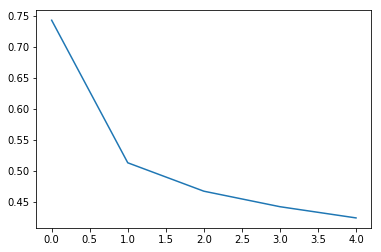

In [14]:
plt.plot(history.history['loss'])

In [ ]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
60000/60000 [==============================] - 61s 1ms/sample - loss: 0.8694 - acc: 0.6835
Epoch 2/5
60000/60000 [==============================] - 52s 874us/sample - loss: 0.5448 - acc: 0.7978
Epoch 3/5
60000/60000 [==============================] - 58s 973us/sample - loss: 0.4754 - acc: 0.8267
Epoch 4/5
29024/60000 [=============>................] - ETA: 32s - loss: 0.4403 - acc: 0.8412

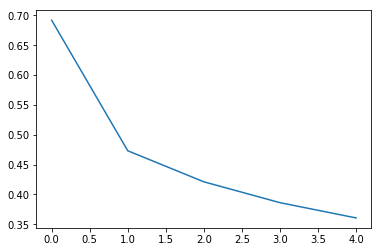

In [18]:
plt.plot(history.history['loss'])

EXERCISES
===

 - Try editing the convolutions. Change the 32s to either 16 or 64. What impact will this have on accuracy and/or training time.
 - Remove the final Convolution. What impact will this have on accuracy or training time?
 - How about adding more Convolutions? What impact do you think this will have? Experiment with it.
 - Remove all Convolutions but the first. What impact do you think this will have? Experiment with it.
 - In the previous lesson you implemented a callback to check on the loss function and to cancel training once it hit a certain amount. See if you can implement that here!